<a id=top-page></a>

# `pykitPIV` demo: Create a **PyTorch** data loader for **pykitPIV**-generated images

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#upload-images">Upload pykitPIV-generated images 
</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import h5py
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <6A7076EE-85BD-37A7-BC35-1D4867F2B3D3> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A84DFEFF-287E-3B94-A7DB-731FA5F9CBBC> /Users/kamilazdybal/anaconda3/envs/latest-stack/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


<a id=upload-images></a>

***

## Upload **pykitPIV**-generated images 

[Go to the top](#top-page)

In [2]:
path = '../docs/data/pykitPIV-dataset-10-PIV-pairs-256-by-256.h5'

In [3]:
class PIVDataset(Dataset):
    """
    Loads and stores the pykitPIV-generated dataset.
    """

    def __init__(self, path, transform=None):

        # Upload the dataset:
        f = h5py.File(path, "r")

        # Access image intensities:
        self.data = np.array(f["I"]).astype("float32")

        # Access flow targets:
        self.target = np.array(f["targets"]).astype("float32")

        # Multiply the v-component of velocity by -1:
        self.target[:,1,:,:] = -self.target[:,1,:,:]

        f.close()

        # Allow for any custom data transforms to be used later:
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):

        # Get the sample:
        sample = self.data[idx], self.target[idx]

        print(self.data[idx].shape)

        # Apply any custom data transforms on this sample:
        if self.transform:
            sample = self.transform(self.data[idx]), self.transform(self.target[idx])

        print(sample[0].shape)
        
        return sample

In [4]:
PIV_data = PIVDataset(path=path)

In [5]:
len(PIV_data)

10

In [6]:
(I, target) = PIV_data[2]

(2, 256, 256)
(2, 256, 256)


In [7]:
I.shape

(2, 256, 256)

In [8]:
target.shape

(2, 256, 256)

In [9]:
(I, target) = PIV_data[2:7]

(5, 2, 256, 256)
(5, 2, 256, 256)


(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)
(2, 256, 256)


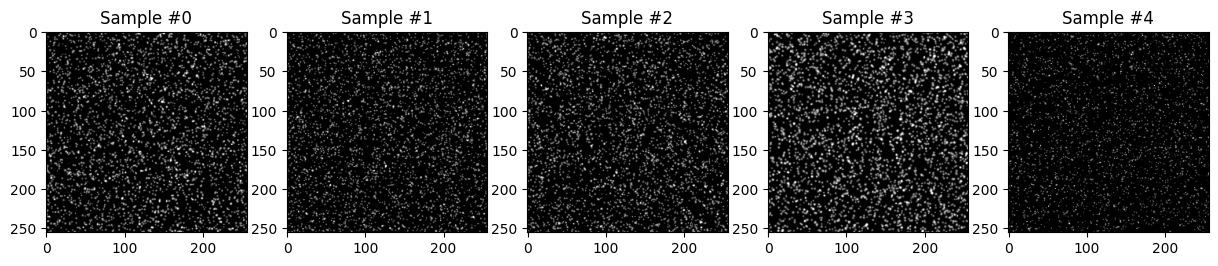

In [10]:
n_samples = 5

fig = plt.figure(figsize=(n_samples*3, 5))
spec = fig.add_gridspec(ncols=n_samples, 
                        nrows=1, 
                        width_ratios=[1 for i in range(0,n_samples)], 
                        height_ratios=[1])

for i in range(0,n_samples):
    I, target = PIV_data[i]
    f = fig.add_subplot(spec[0,i])
    plt.imshow(I[0,:,:], cmap='Greys_r')
    plt.title('Sample #' + str(i))

# plt.savefig('PIV-samples.png', dpi=300, bbox_inches='tight')

In [11]:
transform = None

In [12]:
transform = transforms.ToTensor()

In [13]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.RandomHorizontalFlip(p=0.5)])

In [14]:
train_dataset = PIVDataset(path=path, transform=transform)
test_dataset = PIVDataset(path=path, transform=transform)

In [15]:
(I, target) = train_dataset[0]

(2, 256, 256)
torch.Size([256, 2, 256])


In [16]:
I.shape

torch.Size([256, 2, 256])

In [17]:
target.shape

torch.Size([256, 2, 256])

In [18]:
# Create train and test data loaders:
train_loader = DataLoader(train_dataset,
                      batch_size=5,
                      shuffle=True)

test_loader = DataLoader(test_dataset,
                     batch_size=5,
                     shuffle=True)

In [19]:
train_I, train_targets = next(iter(train_loader))

(2, 256, 256)
torch.Size([256, 2, 256])
(2, 256, 256)
torch.Size([256, 2, 256])
(2, 256, 256)
torch.Size([256, 2, 256])
(2, 256, 256)
torch.Size([256, 2, 256])
(2, 256, 256)
torch.Size([256, 2, 256])


In [20]:
train_I.shape

torch.Size([5, 256, 2, 256])

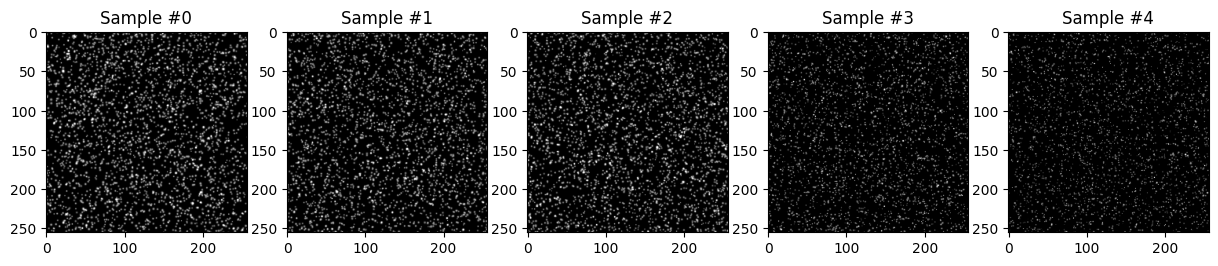

In [21]:
n_samples = 5

fig = plt.figure(figsize=(n_samples*3, 5))
spec = fig.add_gridspec(ncols=n_samples, 
                        nrows=1, 
                        width_ratios=[1 for i in range(0,n_samples)], 
                        height_ratios=[1])

for i in range(0,n_samples):
    
    f = fig.add_subplot(spec[0,i])
    plt.imshow(train_I[i,:,0,:], cmap='Greys_r')
    plt.title('Sample #' + str(i))

# plt.savefig('PIV-samples.png', dpi=300, bbox_inches='tight')

***

© K. Zdybał, C. Mucignat, I. Lunati (2024)